In [466]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris, make_regression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics.pairwise import distance_metrics
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
plt.style.use('default')

In [467]:
iris = load_iris()
features = iris.data

data = pd.DataFrame(features, columns=iris.feature_names)
data.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [468]:
X = data.iloc[:, [0, 2]]
y = iris.target
X.shape, y.shape


((150, 2), (150,))

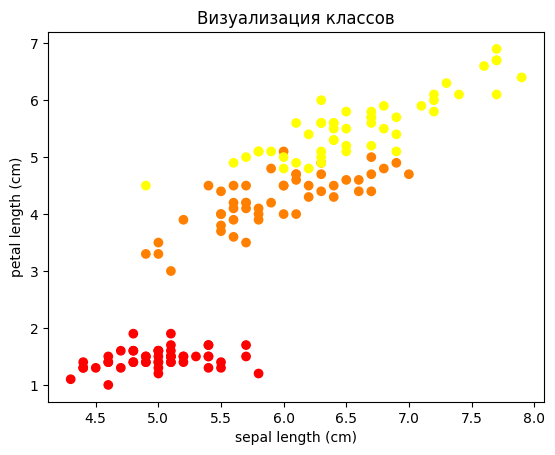

In [469]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap="autumn")

plt.title("Визуализация классов")
plt.xlabel("sepal length (cm)")
plt.ylabel("petal length (cm)")
plt.show()


In [470]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [471]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)

y_pred = knn.predict(X_scaled)

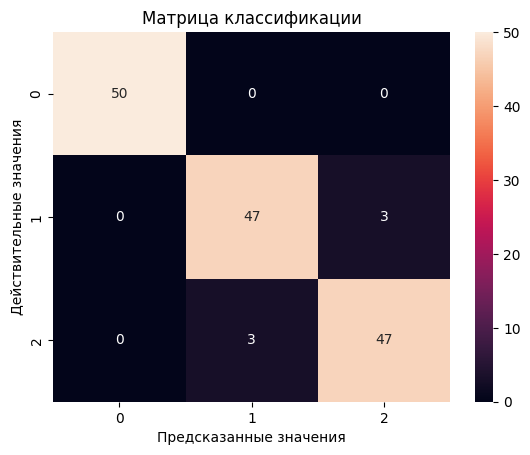

In [472]:
plt.title("Матрица классификации")
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt="d")
plt.ylabel("Действительные значения")
plt.xlabel("Предсказанные значения")
plt.show()


In [473]:
print(classification_report(y_pred, y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



c:\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


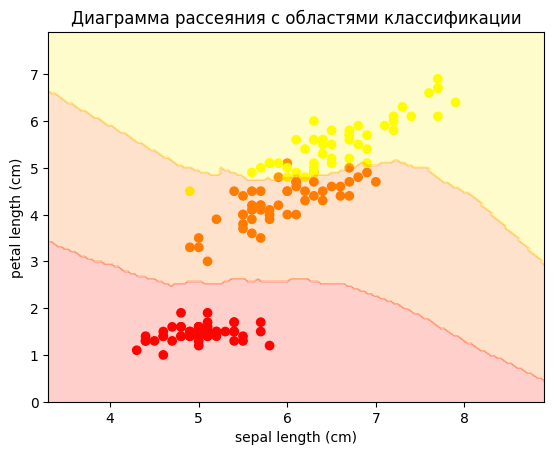

In [474]:
X0 = np.linspace(X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1, X.shape[0])
X1 = np.linspace(X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1, X.shape[0])

X0_grid, X1_grid = np.meshgrid(X0, X1)

XX = np.array([X0_grid.ravel(), X1_grid.ravel()]).T

XX_scaled = scaler.transform(XX)
Z = knn.predict(XX_scaled).reshape(X0_grid.shape)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap="autumn")
plt.contourf(X0_grid, X1_grid, Z, cmap="autumn", alpha=0.2)

plt.xlabel("sepal length (cm)")
plt.ylabel("petal length (cm)")
plt.title("Диаграмма рассеяния с областями классификации")
plt.show()

In [475]:
observation_new = [[5.5, 5]]
observation_new_scaled = scaler.transform(observation_new)
print(knn.predict(observation_new_scaled))
print(knn.predict_proba(observation_new_scaled))
distances, indices = knn.kneighbors(observation_new_scaled)

[2]
[[0. 0. 1.]]


c:\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


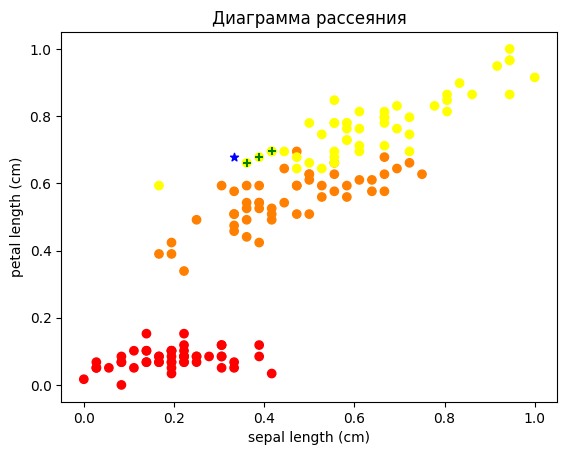

In [476]:
plt.scatter(*X_scaled.T, c=y, cmap="autumn")

plt.scatter(
    *observation_new_scaled[0], marker="*", color="b"
)

plt.scatter(
    *X_scaled[indices[0]][0:3].T, marker="+", color="g"
)

plt.title("Диаграмма рассеяния")
plt.xlabel("sepal length (cm)")
plt.ylabel("petal length (cm)")
plt.show()


---

## №1

Постройте последний график методических указаний в исходном пространстве признаков.


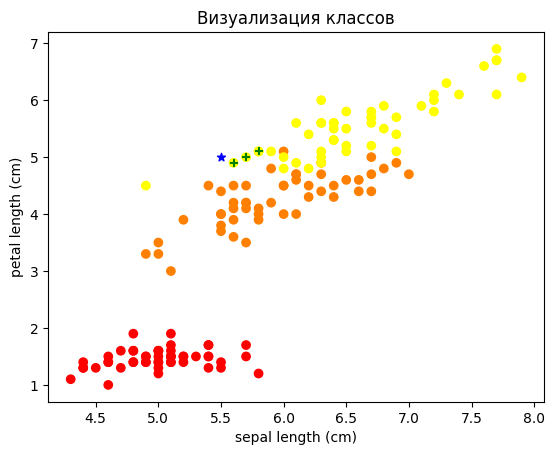

In [477]:
plt.scatter(*X.values.T, c=y, cmap="autumn")

plt.scatter(
    *observation_new[0],
    marker="*",
    color="b",
)

plt.scatter(
    *X.values[indices[0]][0:3].T,
    marker="+",
    color="g",
)

plt.title("Визуализация классов")
plt.xlabel("sepal length (cm)")
plt.ylabel("petal length (cm)")
plt.show()


---

## №2

Попробуйте обучить модель с другим значением k. Визуализируйте области классификации и сравните эффективности модели.


In [478]:
knn = KNeighborsClassifier(n_neighbors=10).fit(X_scaled, y)
y_pred = knn.predict(X_scaled)

c:\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


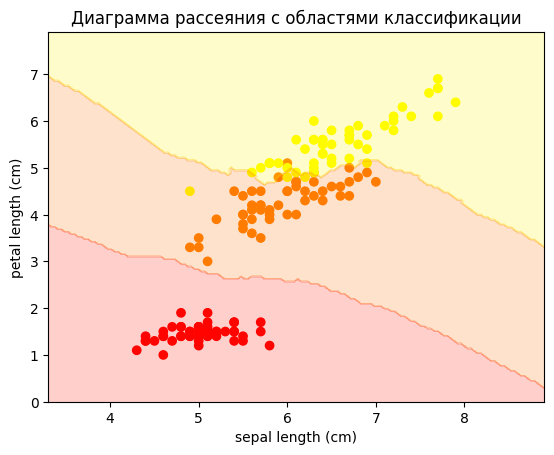

In [479]:
X0 = np.linspace(X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1, X.shape[0])
X1 = np.linspace(X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1, X.shape[0])

X0_grid, X1_grid = np.meshgrid(X0, X1)

XX = np.array([X0_grid.ravel(), X1_grid.ravel()]).T

XX_scaled = scaler.transform(XX)
Z = knn.predict(XX_scaled).reshape(X0_grid.shape)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap="autumn")
plt.contourf(X0_grid, X1_grid, Z, cmap="autumn", alpha=0.2)

plt.xlabel("sepal length (cm)")
plt.ylabel("petal length (cm)")
plt.title("Диаграмма рассеяния с областями классификации")
plt.show()

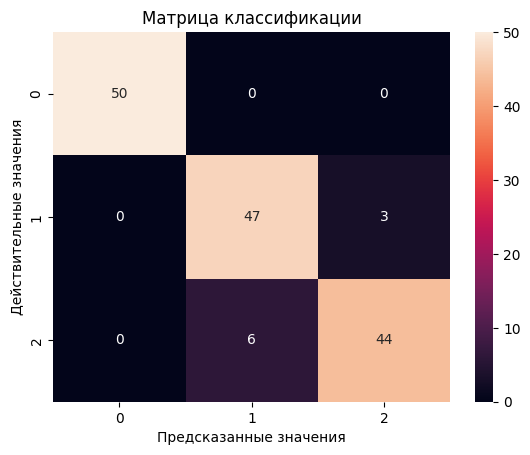

In [480]:
plt.title("Матрица классификации")
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt="d")
plt.ylabel("Действительные значения")
plt.xlabel("Предсказанные значения")
plt.show()

In [481]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.89      0.94      0.91        50
           2       0.94      0.88      0.91        50

    accuracy                           0.94       150
   macro avg       0.94      0.94      0.94       150
weighted avg       0.94      0.94      0.94       150



---

## №3

Подвигайте новое наблюдение в последнем пункте методических указаний. Сдвиньте его за пределы области определения выборки. Как меняется нормализованное значение?


In [482]:
observation_new = [[10, 10]]
observation_new_scaled = scaler.transform(observation_new)
print(knn.predict(observation_new_scaled))
print(knn.predict_proba(observation_new_scaled))
distances, indices = knn.kneighbors(observation_new_scaled)

[2]
[[0. 0. 1.]]


c:\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


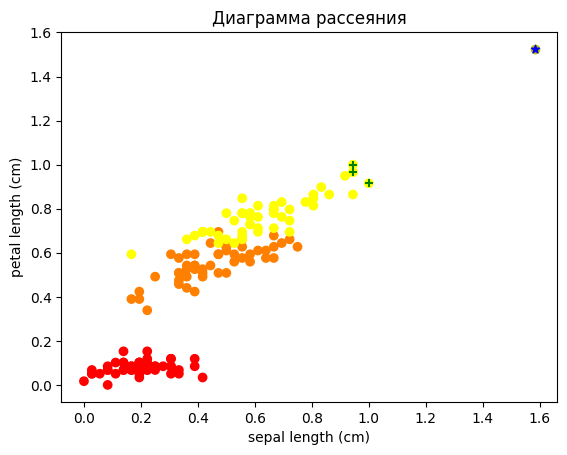

In [483]:
plt.scatter(*X_scaled.T, c=y, cmap="autumn")

plt.scatter(*observation_new_scaled[0], c='y')
plt.scatter(*observation_new_scaled[0], marker="*", color="b")

plt.scatter(*X_scaled[indices[0]][0:3].T, marker="+", color="g")

plt.title("Диаграмма рассеяния")
plt.xlabel("sepal length (cm)")
plt.ylabel("petal length (cm)")
plt.show()


---

## №4

Поэкспериментируйте с разными метриками расстояния. Визуализируйте ближайших соседей нового объекта при разных метриках расстояния.


In [484]:
for name in distance_metrics():
    try:
        knn = KNeighborsClassifier(n_neighbors=5, metric=name)
        knn.fit(X_scaled, y)
    except:
        continue
    y_pred = knn.predict(X_scaled)
    acc = accuracy_score(y, y_pred)
    print(f"Метрика {name}, точность: {acc}")

Метрика cityblock, точность: 0.96
Метрика cosine, точность: 0.7733333333333333
Метрика euclidean, точность: 0.9533333333333334
Метрика haversine, точность: 0.9533333333333334
Метрика l2, точность: 0.9533333333333334
Метрика l1, точность: 0.96
Метрика manhattan, точность: 0.96
Метрика nan_euclidean, точность: 0.96


---

## №5

Обучите модель на полном датасете. Сравните ее эффективность с описанной в методических указаниях. Попробуйте разные значения k.


In [485]:
X = data
y = iris.target

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [486]:
for k in range(3, 16):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_scaled, y)
    y_pred = knn.predict(X_scaled)
    acc = accuracy_score(y, y_pred)
    print(f"Точность модели при {k = }: {acc:.1%}")

Точность модели при k = 3: 96.7%
Точность модели при k = 4: 96.0%
Точность модели при k = 5: 96.0%
Точность модели при k = 6: 96.7%
Точность модели при k = 7: 96.7%
Точность модели при k = 8: 96.7%
Точность модели при k = 9: 97.3%
Точность модели при k = 10: 96.7%
Точность модели при k = 11: 96.0%
Точность модели при k = 12: 96.7%
Точность модели при k = 13: 97.3%
Точность модели при k = 14: 96.7%
Точность модели при k = 15: 96.7%


Модель стала немного точнее

---

## №6

Попробуйте в модели на полном датасете взвешенный алгоритм (аргумент weights объекта KNeighborsClassifier). Сравние его точность с равномерным вариантом.


## №7

Постройте график точности (accuracy) модели в зависимости от значения k. Сделайте вывод.


In [487]:
accuracy = []
for k in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_scaled, y)
    y_pred = knn.predict(X_scaled)
    acc = accuracy_score(y, y_pred)
    accuracy.append([k,acc])
    print(f"Точность модели при {k = }: {acc:.1%}")

Точность модели при k = 1: 100.0%
Точность модели при k = 2: 97.3%
Точность модели при k = 3: 96.7%
Точность модели при k = 4: 96.0%
Точность модели при k = 5: 96.0%
Точность модели при k = 6: 96.7%
Точность модели при k = 7: 96.7%
Точность модели при k = 8: 96.7%
Точность модели при k = 9: 97.3%
Точность модели при k = 10: 96.7%
Точность модели при k = 11: 96.0%
Точность модели при k = 12: 96.7%
Точность модели при k = 13: 97.3%
Точность модели при k = 14: 96.7%
Точность модели при k = 15: 96.7%


In [488]:
accuracy = []
for k in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=k, weights="distance").fit(X_scaled, y)
    y_pred = knn.predict(X_scaled)
    acc = accuracy_score(y, y_pred)
    accuracy.append([k,acc])
    print(f"Точность модели при {k = }: {acc:.1%}")


Точность модели при k = 1: 100.0%
Точность модели при k = 2: 100.0%
Точность модели при k = 3: 100.0%
Точность модели при k = 4: 100.0%
Точность модели при k = 5: 100.0%
Точность модели при k = 6: 100.0%
Точность модели при k = 7: 100.0%
Точность модели при k = 8: 100.0%
Точность модели при k = 9: 100.0%
Точность модели при k = 10: 100.0%
Точность модели при k = 11: 100.0%
Точность модели при k = 12: 100.0%
Точность модели при k = 13: 100.0%
Точность модели при k = 14: 100.0%
Точность модели при k = 15: 100.0%


Точность получилась абсолютной

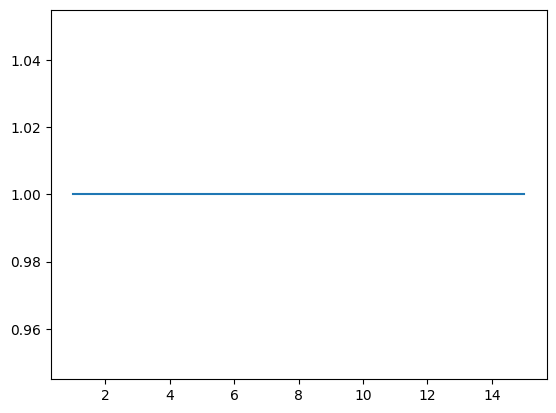

In [489]:
plt.plot(*np.transpose(accuracy))

---

## №8

Выберите датасет и постройте регрессию при помощи метода ближайших соседей.


In [490]:
X, y = make_regression(n_samples=100, n_features=2, noise=3, random_state=42)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

model = KNeighborsRegressor(n_neighbors=3).fit(X_scaled, y)    
y_pred = model.predict(X_scaled)

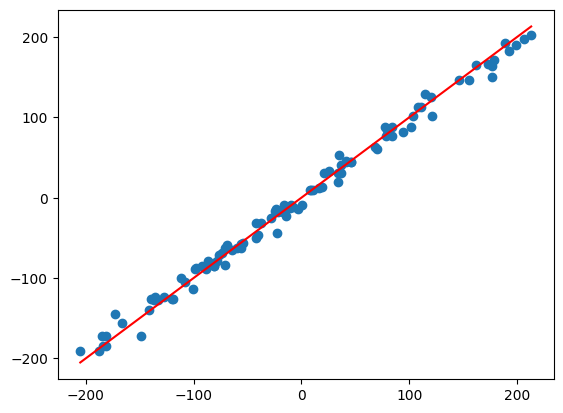

In [491]:
plt.scatter(y, y_pred)
plt.plot([min(y), max(y)], [min(y), max(y)], color='r')